## 1. IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df=pd.read_csv('twitter.csv')
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
#Drop the 'id' column from the DataFrame.
df.drop(['id'],axis=1,inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
#0 positive tweets 1 negative tweets
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
df.isnull().sum() #no missingvalues

label    0
tweet    0
dtype: int64

## 2. EXPLORE DATASET

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD46DAF248>]],
      dtype=object)

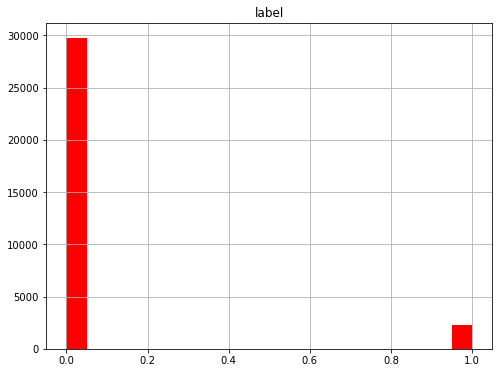

In [11]:
#data visualization with histogram
df.hist(bins = 20, figsize = (8,6), color = 'r')

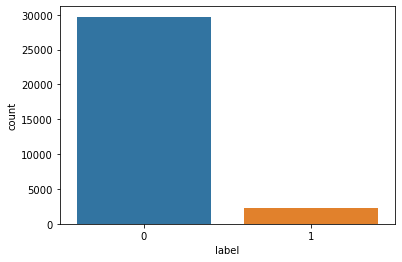

In [12]:
#Plot similar figure using seaborn countplot

sns.countplot(df['label'],label='Count')

In [13]:
# Let's get the length of the messages
df['length']=df['tweet'].apply(len)

In [14]:
df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


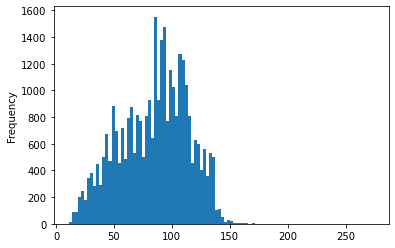

In [15]:
df['length'].plot(bins=100, kind='hist') 

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.0,0.0,0.0,1.0
length,31962.0,84.739628,29.455749,11.0,63.0,88.0,108.0,274.0


In [19]:
# Let's see the shortest message 
df[df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [20]:
#View the message with the average length
df[df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [22]:
positive = df[df['label']==0]
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [24]:
positive.to_csv('positive_tweets.csv')

In [25]:
negative = df[df['label']==1]
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


In [26]:
negative.to_csv('negative_tweets.csv')

## 3. PLOT THE WORDCLOUD

In [27]:
sentences=df['tweet'].to_list()
sentences[:5]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

In [28]:
one_string_sentences=" ".join(sentences)

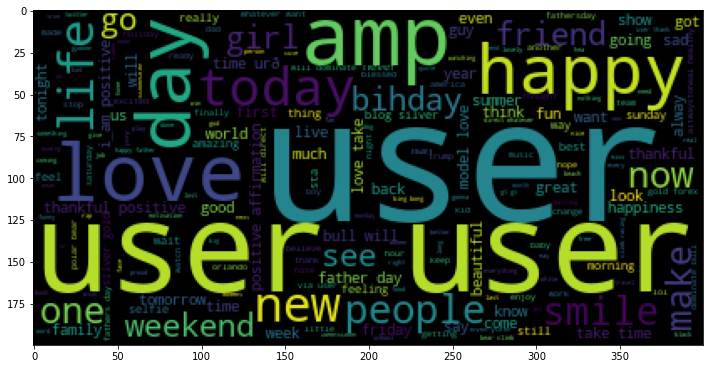

In [29]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(one_string_sentences))

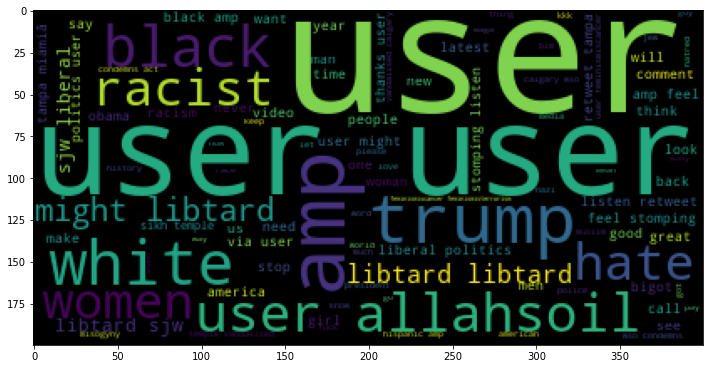

In [30]:
#Plot the wordcloud of the "negative" dataframe
negative_list=negative['tweet'].tolist()
one_string_negative_sentences="".join(negative_list)
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(one_string_negative_sentences))

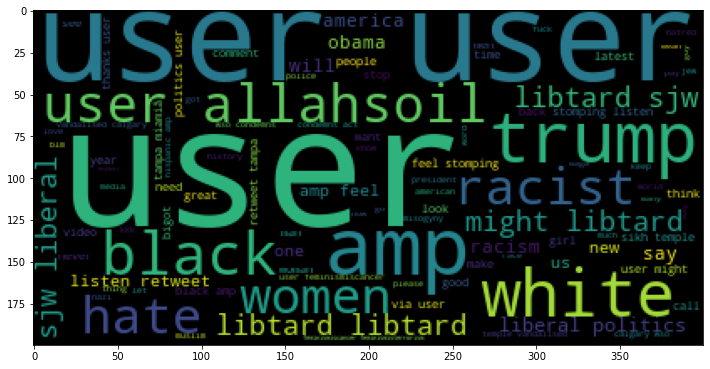

In [31]:
#Plot the wordcloud of the "positive" dataframe
positive_list=negative['tweet'].tolist()
one_string_positive_sentences="".join(positive_list)
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(one_string_positive_sentences))

## 4. PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
Test = 'Good morning people :)... I am having fun learning Machine learning!!!...'

In [34]:
Test_punc_removed=[char for char in Test if char not in string.punctuation]

In [35]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [36]:
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning people  I am having fun learning Machine learning'

In [37]:
#Remove punctuations using a different method
Test_punc_removed=[]
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning people  I am having fun learning Machine learning'

## 5. PERFORM DATA CLEANING - REMOVE STOPWORDS

In [38]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
Test_punc_removed_join_clean=[ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['Good', 'morning', 'people', 'fun', 'learning', 'Machine', 'learning']

In [41]:
#For the following text, create a pipeline to remove punctuations followed by removing stopwords
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'
challenge = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challenge)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

## 6. PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sample_data)

In [44]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [45]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


Without doing any code, perform count vectorization for the following list:<br>
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']<br>
Confirm your answer with code

In [46]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


## 7. CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [47]:
#clean version
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [48]:
# Let's test the newly added function
df_clean =df['tweet'].apply(message_cleaning)

In [49]:
print(df_clean[5]) # show the cleaned up version()

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [50]:
print(df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning,dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(df['tweet']).toarray()

In [52]:
tweets_countvectorizer.shape

(31962, 47386)

In [53]:
X=tweets_countvectorizer

In [54]:
y = df['label']

## 8. TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [55]:
X.shape

(31962, 47386)

In [56]:
y.shape

(31962,)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## 9. ASSESS TRAINED MODEL PERFORMANCE

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

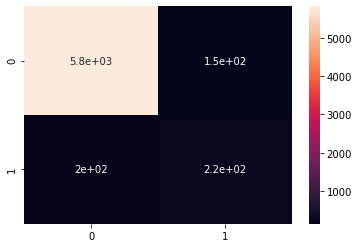

In [60]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [61]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5969
           1       0.59      0.52      0.55       424

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [62]:
#EXCELLENT JOB! ACCURACY_Score 0.94